In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
suv = pd.read_csv('suv_data.csv')
suv = suv.drop('User ID', axis=1)
suv.head()


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
suv.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [4]:
suv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [5]:
missing_values = suv.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


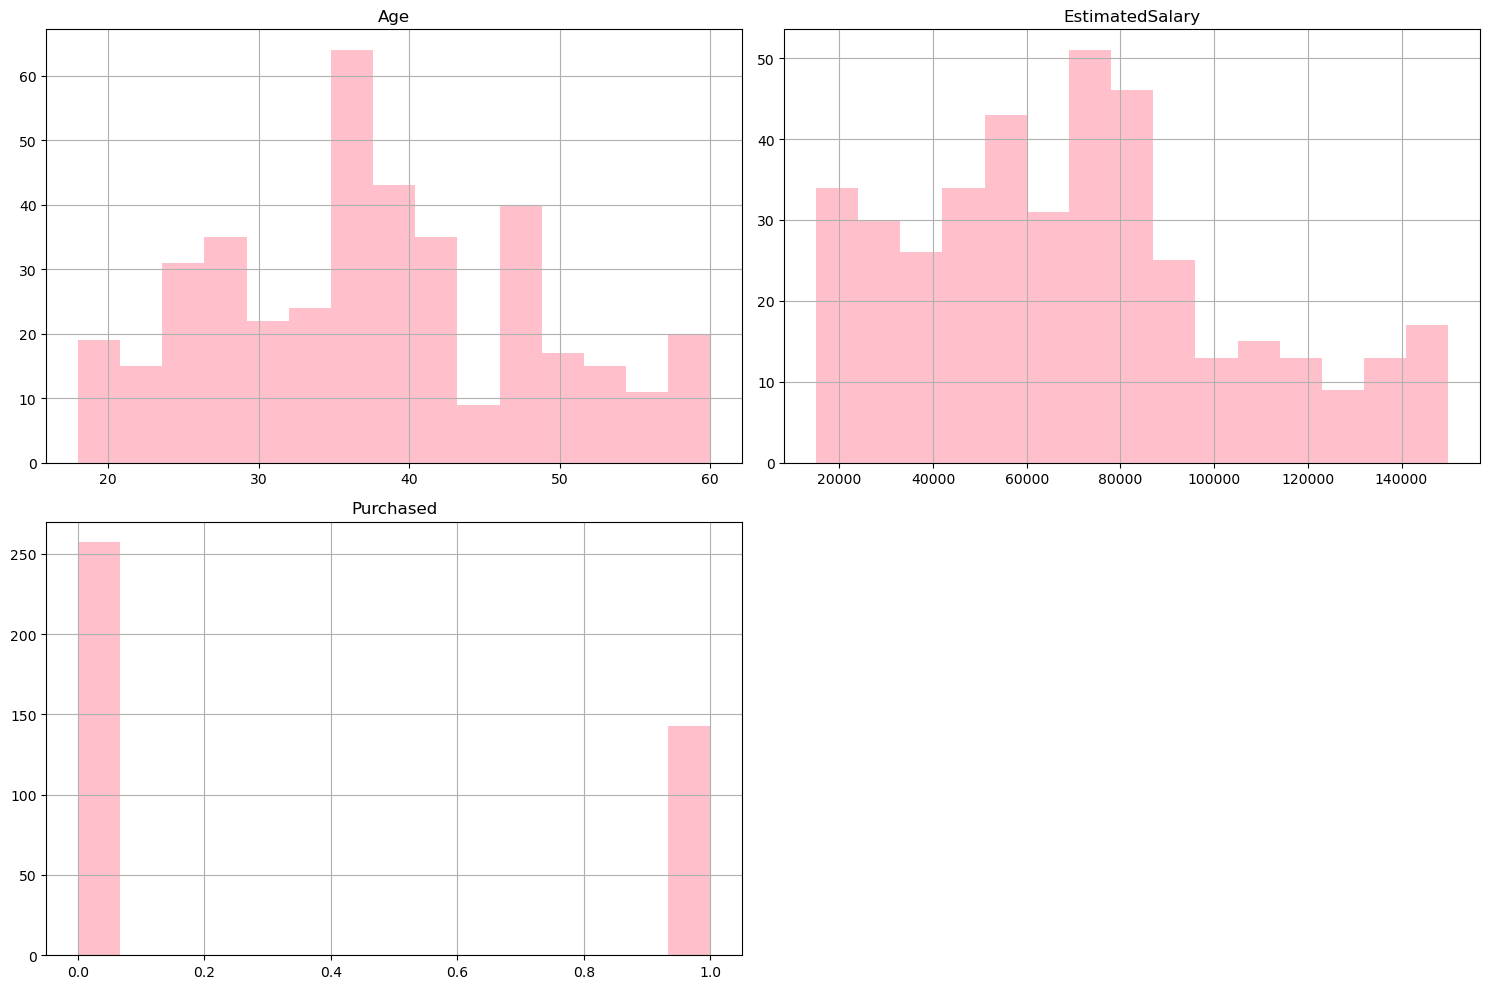

In [6]:
suv.hist(bins=15, figsize=(15, 10),color = "pink")
plt.tight_layout()
plt.show()


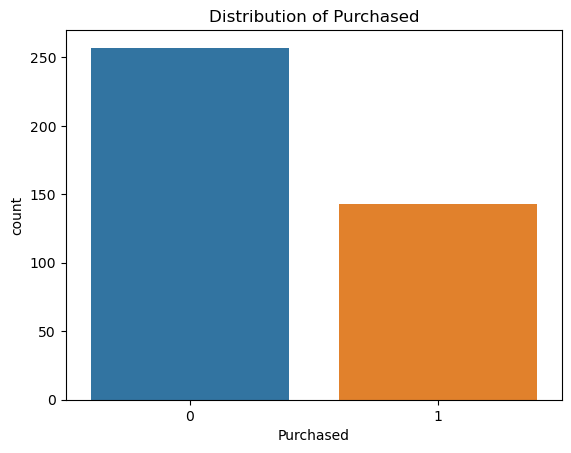

In [7]:
sns.countplot(data=suv, x='Purchased')
plt.title('Distribution of Purchased')
plt.show()


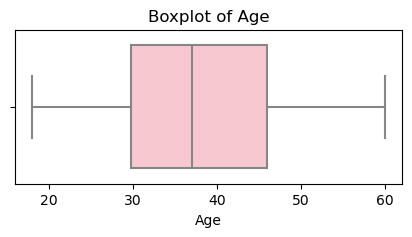

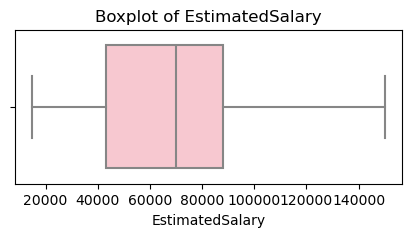

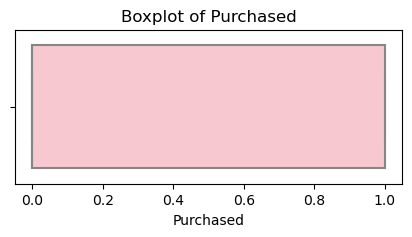

In [8]:
numeric_data = suv.select_dtypes(include=['float64', 'int64'])
for col in numeric_data.columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=suv[col],color = "pink")
    plt.title(f'Boxplot of {col}')
    plt.show()

In [9]:
X = suv.drop(['Purchased'], axis='columns')
y = suv['Purchased']

X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)


Features shape (X): (400, 3)
Target shape (y): (400,)


In [10]:
X = suv.drop(['Purchased'], axis='columns')
y = suv['Purchased']

X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)


Features shape (X): (400, 3)
Target shape (y): (400,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (320, 3)
X_test shape: (80, 3)
y_train shape: (320,)
y_test shape: (80,)


In [12]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Accuracy: 80.0
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        52
           1       0.75      0.64      0.69        28

    accuracy                           0.80        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.80      0.80      0.80        80



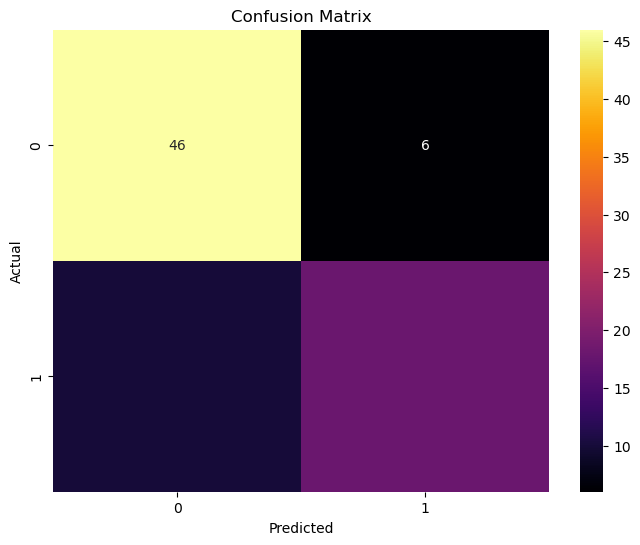

In [13]:
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [14]:
def predict_suv_purchase(model):
    print("Please enter the following details:")
    
    def get_valid_input(prompt, input_type):
        while True:
            try:
                return input_type(input(prompt))
            except ValueError:
                print("Invalid input. Please enter the correct value.")

    gender = get_valid_input("Enter Gender (Male=0, Female=1): ", int)
    age = get_valid_input("Enter Age: ", int)
    estimated_salary = get_valid_input("Enter Estimated Salary: ", float)
    
    input_data = pd.DataFrame([[gender, age, estimated_salary]], 
                              columns=['Gender', 'Age', 'EstimatedSalary'])
    
    prediction = model.predict(input_data)
    print(f"The prediction is: {'Purchased' if prediction[0] == 1 else 'Not Purchased'}")
predict_suv_purchase(knn_model)


Please enter the following details:
Enter Gender (Male=0, Female=1): 0
Enter Age: 19
Enter Estimated Salary: 19000
The prediction is: Not Purchased


In [15]:
def predict_suv_purchase(model):
    print("Please enter the following details:")
    
    def get_valid_input(prompt, input_type):
        while True:
            try:
                return input_type(input(prompt))
            except ValueError:
                print("Invalid input. Please enter the correct value.")

    gender = get_valid_input("Enter Gender (Male=0, Female=1): ", int)
    age = get_valid_input("Enter Age: ", int)
    estimated_salary = get_valid_input("Enter Estimated Salary: ", float)
    
    input_data = pd.DataFrame([[gender, age, estimated_salary]], 
                              columns=['Gender', 'Age', 'EstimatedSalary'])
    
    prediction = model.predict(input_data)
    print(f"The prediction is: {'Purchased' if prediction[0] == 1 else 'Not Purchased'}")
predict_suv_purchase(knn_model)

Please enter the following details:
Enter Gender (Male=0, Female=1): 1
Enter Age: 23
Enter Estimated Salary: 43000
The prediction is: Not Purchased
